### PROBLEM STATEMENT:

A Indian company CARSabkeLiye aspires to enter the market by setting up their stores as well as going online to give competition to their counterparts.
They have contracted a consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of used cars. The company wants to know:

•	Which variables are significant in predicting the price of used car

•	How well those variables describe the price of used car

### BUSINESS GOAL:

We are required to model the price of used cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the business strategy, to meet certain price levels for penetrating into the market. Further, the model will be a good way for management to understand the pricing dynamics of the market.

### DATA DEFINITION:

**name:** The brand and model of the car. 

**year:** The year or edition of the model.

**km_driven:** The total kilometres driven in the car by the previous owner(s) in KM.

**fuel:** The type of fuel used by the car.

**transmission:** The type of transmission used by the car.

**seller_type:** Whether the seller is an Individual seller or a Dealer or a Trademark Dealer.

**owner:** Whether the car is a first-hand owned car or second hand or third hand, etc.

**mileage:** The standard mileage offered by the car company in kmpl

**engine:** The displacement volume of the engine in cc.

**max_power:** The maximum power of the engine in bhp.

**seats:** The number of seats in the car.

**selling_price:** The price of the used car in INR Lakhs. (Target Variable)

#### LIBRARIES:

In [125]:
# for dataframe manipulations and calculations:

import pandas as pd
import numpy as np

# for data visualizations:

import matplotlib.pyplot as plt 
import seaborn as sns

# for ignoring warnings:

import warnings
warnings.filterwarnings('ignore')

# for train and test:

from sklearn.model_selection import train_test_split

# for linear regression and decission tree:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

**DATA PREPARATION**

In [126]:
df = pd.read_csv('car_data.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [127]:
df.shape

(8128, 12)

Summary of all the variables in th dataset:

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


The data set has 12 variables out of which 4 are numerical, and 8 are categorical. 

4 variables have null values (mileage, engine, max_power, torque, seats).

In [129]:
df['mileage'] = df['mileage'].replace('nan', np.nan)
df['engine'] = df['engine'].replace('nan', np.nan)
df['max_power'] = df['max_power'].replace('nan', np.nan)
df['seats'] = df['seats'].replace('nan', np.nan)

In [130]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [131]:
# removing units:

df['mileage'] = df['mileage'].str.extract(r'(\d+\.?\d*)', expand=False)
df['engine'] = df['engine'].str.extract(r'(\d+\.?\d*)', expand=False)
df['max_power'] = df['max_power'].str.extract(r'(\d+\.?\d*)', expand=False)

In [132]:
# extracting the first word from name:

df['name'] = df['name'].str.split().str[0]

In [133]:
# Creating an age column:

max_year = df['year'].max()
print(max_year)

df['year'] = max_year - df['year']
df

2020


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,6,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda,6,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda,14,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai,10,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti,13,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,7,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,5.0
8124,Hyundai,13,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,5.0
8125,Maruti,11,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,73.9,5.0
8126,Tata,7,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70,5.0


In [134]:
# renaming the year as age of vehicle:

df = df.rename (columns = {'year' : 'age_car'})
df

,name,age_car,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,6,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda,6,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda,14,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai,10,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti,13,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,7,320000,110000,Petrol,Individual,Manual,First Owner,18.5,1197,82.85,5.0
8124,Hyundai,13,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8,1493,110,5.0
8125,Maruti,11,382000,120000,Diesel,Individual,Manual,First Owner,19.3,1248,73.9,5.0
8126,Tata,7,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70,5.0


In [135]:
df.head()

,name,age_car,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,6,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,5.0
1,Skoda,6,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda,14,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497,78,5.0
3,Hyundai,10,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396,90,5.0
4,Maruti,13,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298,88.2,5.0


**Variable Type**

In [136]:
df.dtypes

name              object
age_car            int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats            float64
dtype: object

In [137]:
# changing to correct data types:

df['mileage'] = df['mileage'].astype('float64')
df['engine'] = df['engine'].astype('float64')
df['max_power'] = df['max_power'].astype('float64')

In [138]:
# re-checking the dtypes:

df.dtypes

name              object
age_car            int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

Interpretation:

    According to the data defination, certain features like ....

**Data Cleaning:**

In [139]:
# checking for the number of missing values

missing_values = df.isnull().sum()
missing_values

name               0
age_car            0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        216
seats            221
dtype: int64

In [140]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = list(df.isnull().sum())

# calculate percentage of the missing values
percent = round(((df.isnull().sum()/df.shape[0])*100),2)

percent = [str(i)+"%" for i in percent]

# concatenate the total missing values and percentage of the missing values
missing_data = pd.DataFrame({"total":total,"percent":percent})

#add the data types
missing_data.index=df.columns
missing_data['Type'] = df[missing_data.index].dtypes

#view the missing data   
missing_data.sort_values(by='total', ascending=False, inplace=True)
missing_data

,total,percent,Type
mileage,221,2.72%,float64
engine,221,2.72%,float64
seats,221,2.72%,float64
max_power,216,2.66%,float64
name,0,0.0%,object
age_car,0,0.0%,int64
selling_price,0,0.0%,int64
km_driven,0,0.0%,int64
fuel,0,0.0%,object
seller_type,0,0.0%,object


Interpretation:
    
    

In [141]:
# treating missing values:

df['mileage'].fillna(df['mileage'].mean(),inplace=True)
df['engine'].fillna(df['engine'].mean(),inplace=True)
df['max_power'].fillna(df['max_power'].mean(),inplace=True)
df['seats'].fillna(df['seats'].median(),inplace=True)

In [142]:
# re-checking the missing values:

df.isnull().sum()

name             0
age_car          0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

Interpretation:
    
    There are no missing values in the data.

In [143]:
#Outliers
#q1, q3 quantiles
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

#Inter Quantile Range
IQR = q3-q1

#upperlimit
ul = q3+(IQR*1.5)
#lower limit
ll = q1-(IQR*1.5)

In [144]:
#count of outliers
print(df[df>ul].count())
print(df[df<ll].count())

name                0
age_car            81
selling_price     600
km_driven         170
fuel                0
seller_type         0
transmission        0
owner               0
mileage             7
engine           1183
max_power         579
seats            1518
dtype: int64
name               0
age_car            0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage           17
engine             0
max_power          6
seats            135
dtype: int64


In [145]:
def remove_outliers(dataframe, column_name):
    Q1 = dataframe[column_name].quantile(0.25)
    Q3 = dataframe[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    upper_lim = Q3 + 1.5 * IQR
    lower_lim = Q1 - 1.5 * IQR
    
    outlier_count_before = len(dataframe[(dataframe[column_name] > upper_lim) | (dataframe[column_name] < lower_lim)])
    
    dataframe[column_name] = np.where(dataframe[column_name] > upper_lim, upper_lim,
                                      np.where(dataframe[column_name] < lower_lim, lower_lim,
                                               dataframe[column_name]))
    
    outlier_count_after = len(dataframe[(dataframe[column_name] > upper_lim) | (dataframe[column_name] < lower_lim)])
    
    print('Outliers before removal:', outlier_count_before)
    print('Outliers after removal:', outlier_count_after)
    
    return dataframe

In [146]:
df = remove_outliers(df, 'engine')

Outliers before removal: 1183
Outliers after removal: 0


In [147]:
df = remove_outliers(df,'seats')

Outliers before removal: 1653
Outliers after removal: 0


In [148]:
df = remove_outliers(df,'max_power')

Outliers before removal: 585
Outliers after removal: 0


In [149]:
df = remove_outliers(df,'mileage')

Outliers before removal: 24
Outliers after removal: 0


In [150]:
df = remove_outliers(df,'age_car')

Outliers before removal: 81
Outliers after removal: 0


**Observation:**

    1. km_driven is right skewed.
    
    2. Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. need to check further.
    
    3. Engine ,power and price are right skewed and has outliers on upper side.
    
    4. Age of car is right skewed.

**The statistical summary of numerical variables:**

In [151]:
df.describe()

,age_car,selling_price,km_driven,mileage,engine,max_power,seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8128.0
mean,6.160433,6.382718e+05,6.981951e+04,19.433459,1416.605638,89.076504,5.0
std,3.914252,8.062534e+05,5.655055e+04,3.901041,406.157367,28.505589,0.0
min,0.000000,2.999900e+04,1.000000e+00,8.583750,624.000000,18.375000,5.0
25%,3.000000,2.549990e+05,3.500000e+04,16.800000,1197.000000,68.100000,5.0
50%,5.000000,4.500000e+05,6.000000e+04,19.418783,1248.000000,83.100000,5.0
75%,9.000000,6.750000e+05,9.800000e+04,22.277500,1582.000000,101.250000,5.0
max,18.000000,1.000000e+07,2.360457e+06,30.493750,2159.500000,150.975000,5.0


**The statistical summary of categorical variables:**

In [152]:
df.describe(include = 'object')

,name,fuel,seller_type,transmission,owner
count,8128,8128,8128,8128,8128
unique,32,4,3,2,5
top,Maruti,Diesel,Individual,Manual,First Owner
freq,2448,4402,6766,7078,5289


### Univariate Analysis

ANALYSING NUMERICAL VARIABLES:

In [153]:
df_num = df.select_dtypes (include = 'number')
df_num

,age_car,selling_price,km_driven,mileage,engine,max_power,seats
0,6.0,450000,145500,23.40,1248.0,74.00,5.0
1,6.0,370000,120000,21.14,1498.0,103.52,5.0
2,14.0,158000,140000,17.70,1497.0,78.00,5.0
3,10.0,225000,127000,23.00,1396.0,90.00,5.0
4,13.0,130000,120000,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...
8123,7.0,320000,110000,18.50,1197.0,82.85,5.0
8124,13.0,135000,119000,16.80,1493.0,110.00,5.0
8125,11.0,382000,120000,19.30,1248.0,73.90,5.0
8126,7.0,290000,25000,23.57,1396.0,70.00,5.0


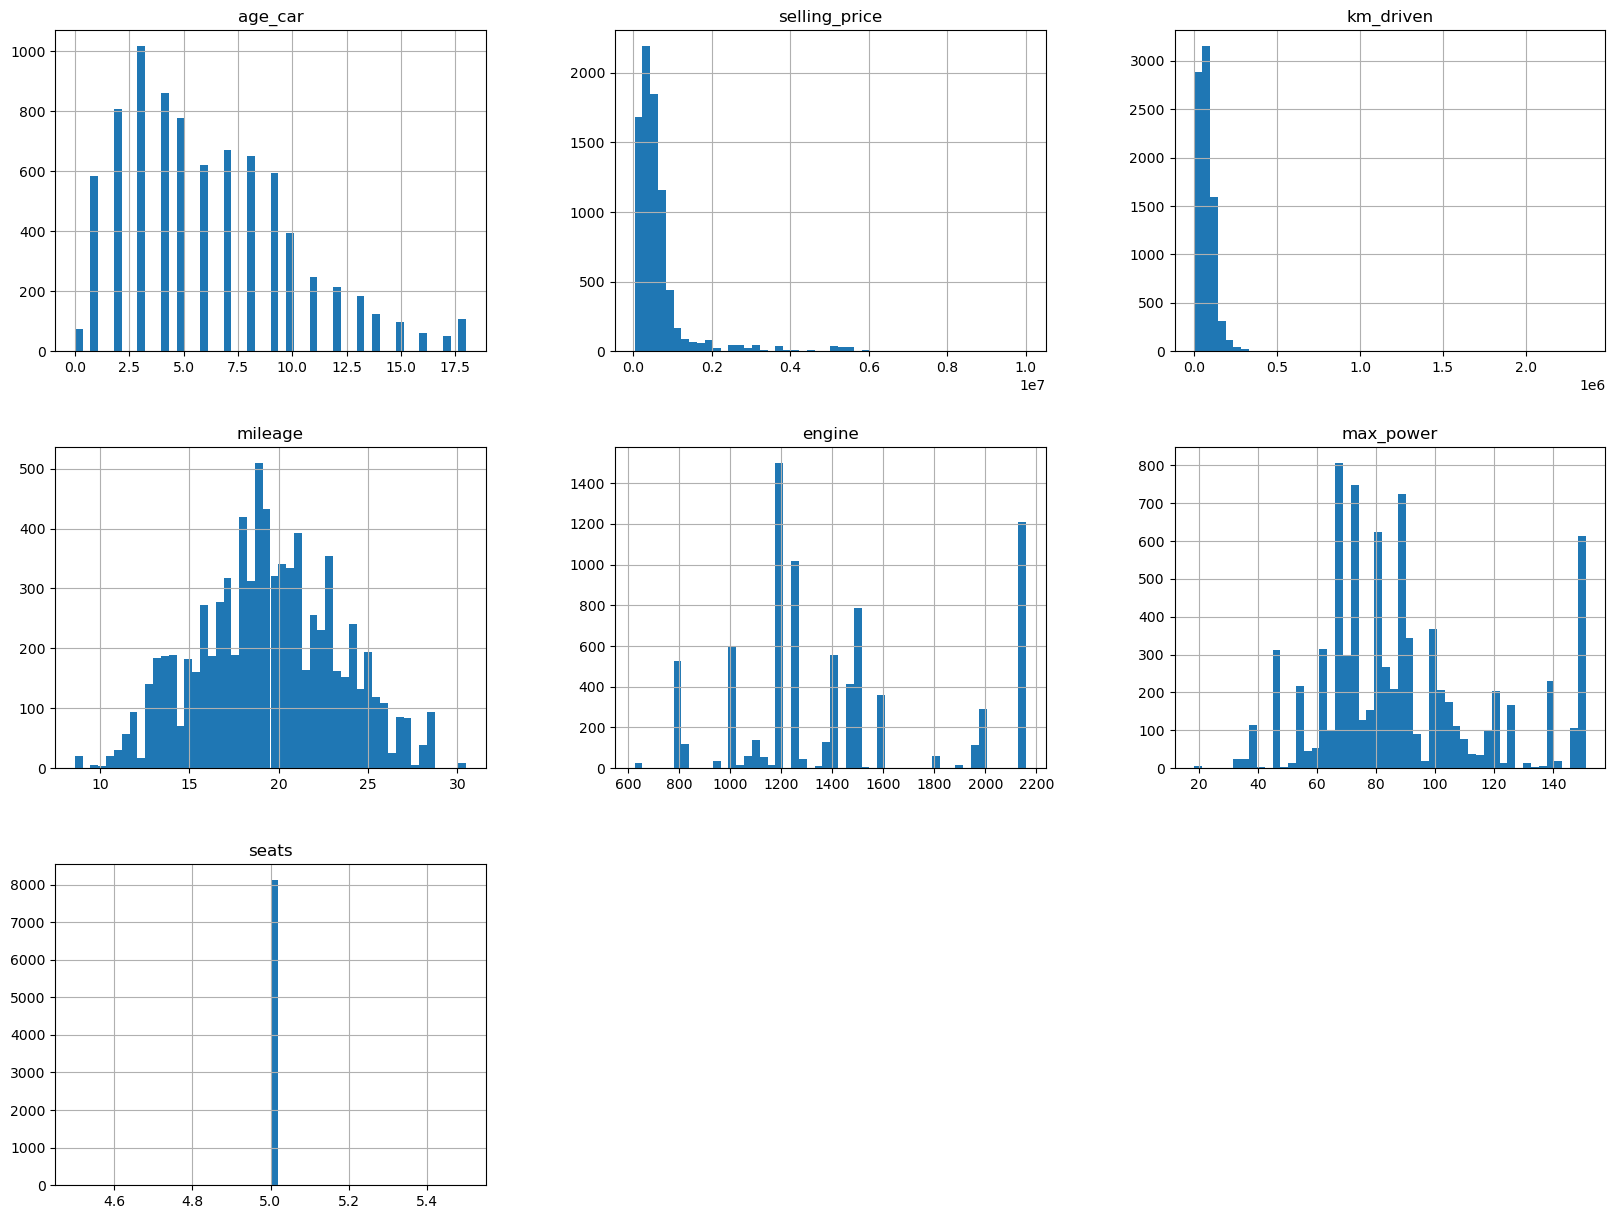

In [154]:
df_num.hist(bins=50,figsize=(20,15))
plt.title('Distribution of Numerical columns');

**Observation:**

    1. km_driven is right skewed.
    
    2. mileage is almost Normally distrubuted. Has few outliers on upper and lower side. need to check further.
    
    3. Engine ,power and price are right skewed and has outliers on upper side.
    
    4. Age of car is right skewed.

In [155]:
df_num.skew()

age_car           0.819382
selling_price     4.193533
km_driven        11.170910
mileage           0.012585
engine            0.614442
max_power         0.733757
seats             0.000000
dtype: float64

In [156]:
df_num.kurt()

age_car            0.272142
selling_price     21.081289
km_driven        384.097414
mileage           -0.369687
engine            -0.528690
max_power         -0.036217
seats              0.000000
dtype: float64

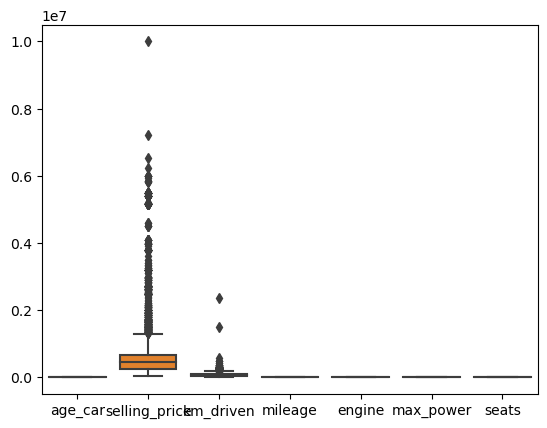

In [157]:
sns.boxplot(data = df_num);

ANALYSING THE CATEGORICAL VARIABLES:

In [158]:
df_cat = df.select_dtypes (include = 'object')
df_cat

,name,fuel,seller_type,transmission,owner
0,Maruti,Diesel,Individual,Manual,First Owner
1,Skoda,Diesel,Individual,Manual,Second Owner
2,Honda,Petrol,Individual,Manual,Third Owner
3,Hyundai,Diesel,Individual,Manual,First Owner
4,Maruti,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...
8123,Hyundai,Petrol,Individual,Manual,First Owner
8124,Hyundai,Diesel,Individual,Manual,Fourth & Above Owner
8125,Maruti,Diesel,Individual,Manual,First Owner
8126,Tata,Diesel,Individual,Manual,First Owner


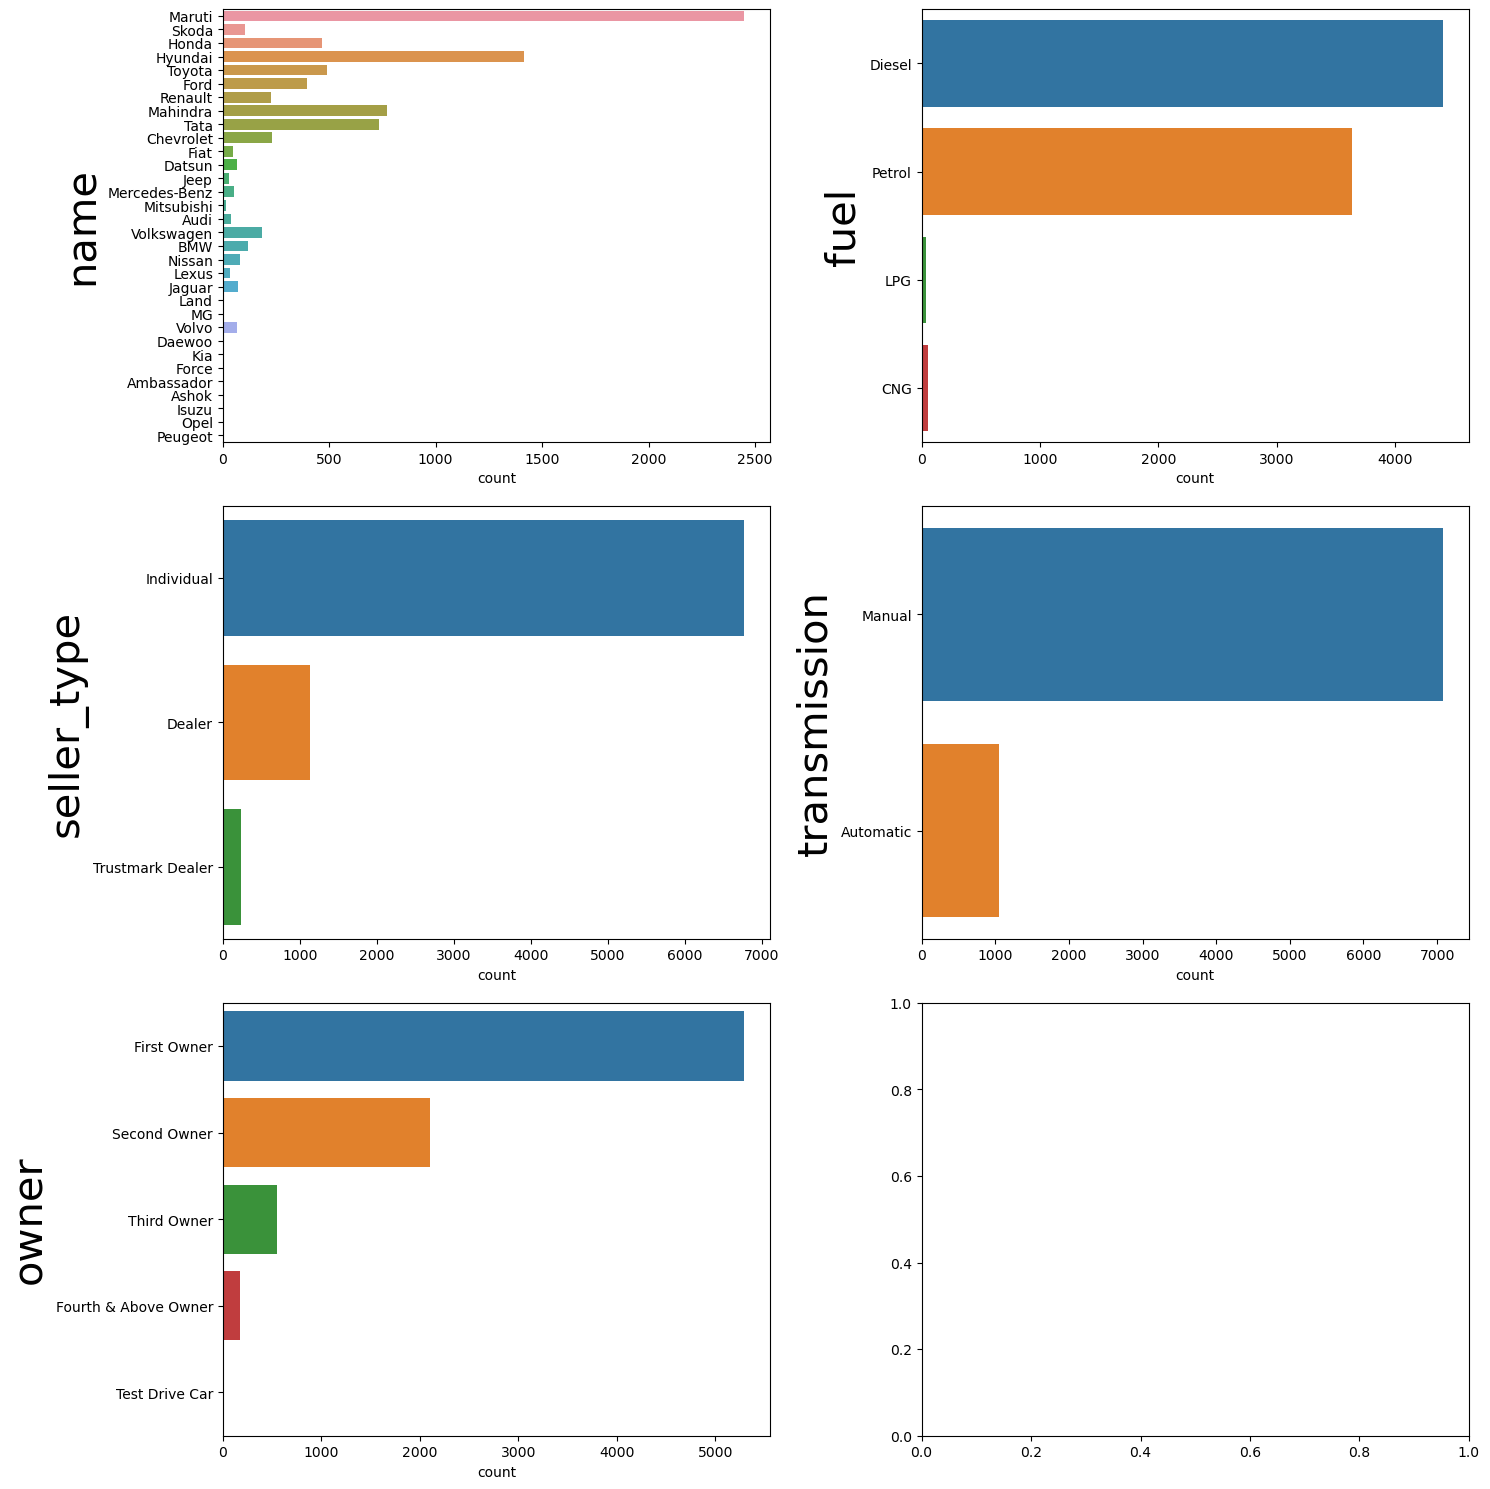

In [159]:
# ploting the count distribution for each categorical variable 

fig, ax = plt.subplots(3, 2, figsize=(15, 15))

# plot a count plot for all the categorical variables

for variable, subplot in zip(df_cat, ax.flatten()):
   
    countplot = sns.countplot(y=df[variable], ax=subplot)
    countplot.set_ylabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

### Bivariate Analysis:

ANALYSING RELATIONSHIP BETWEEN ALL NUMERICAL VARIABLES:

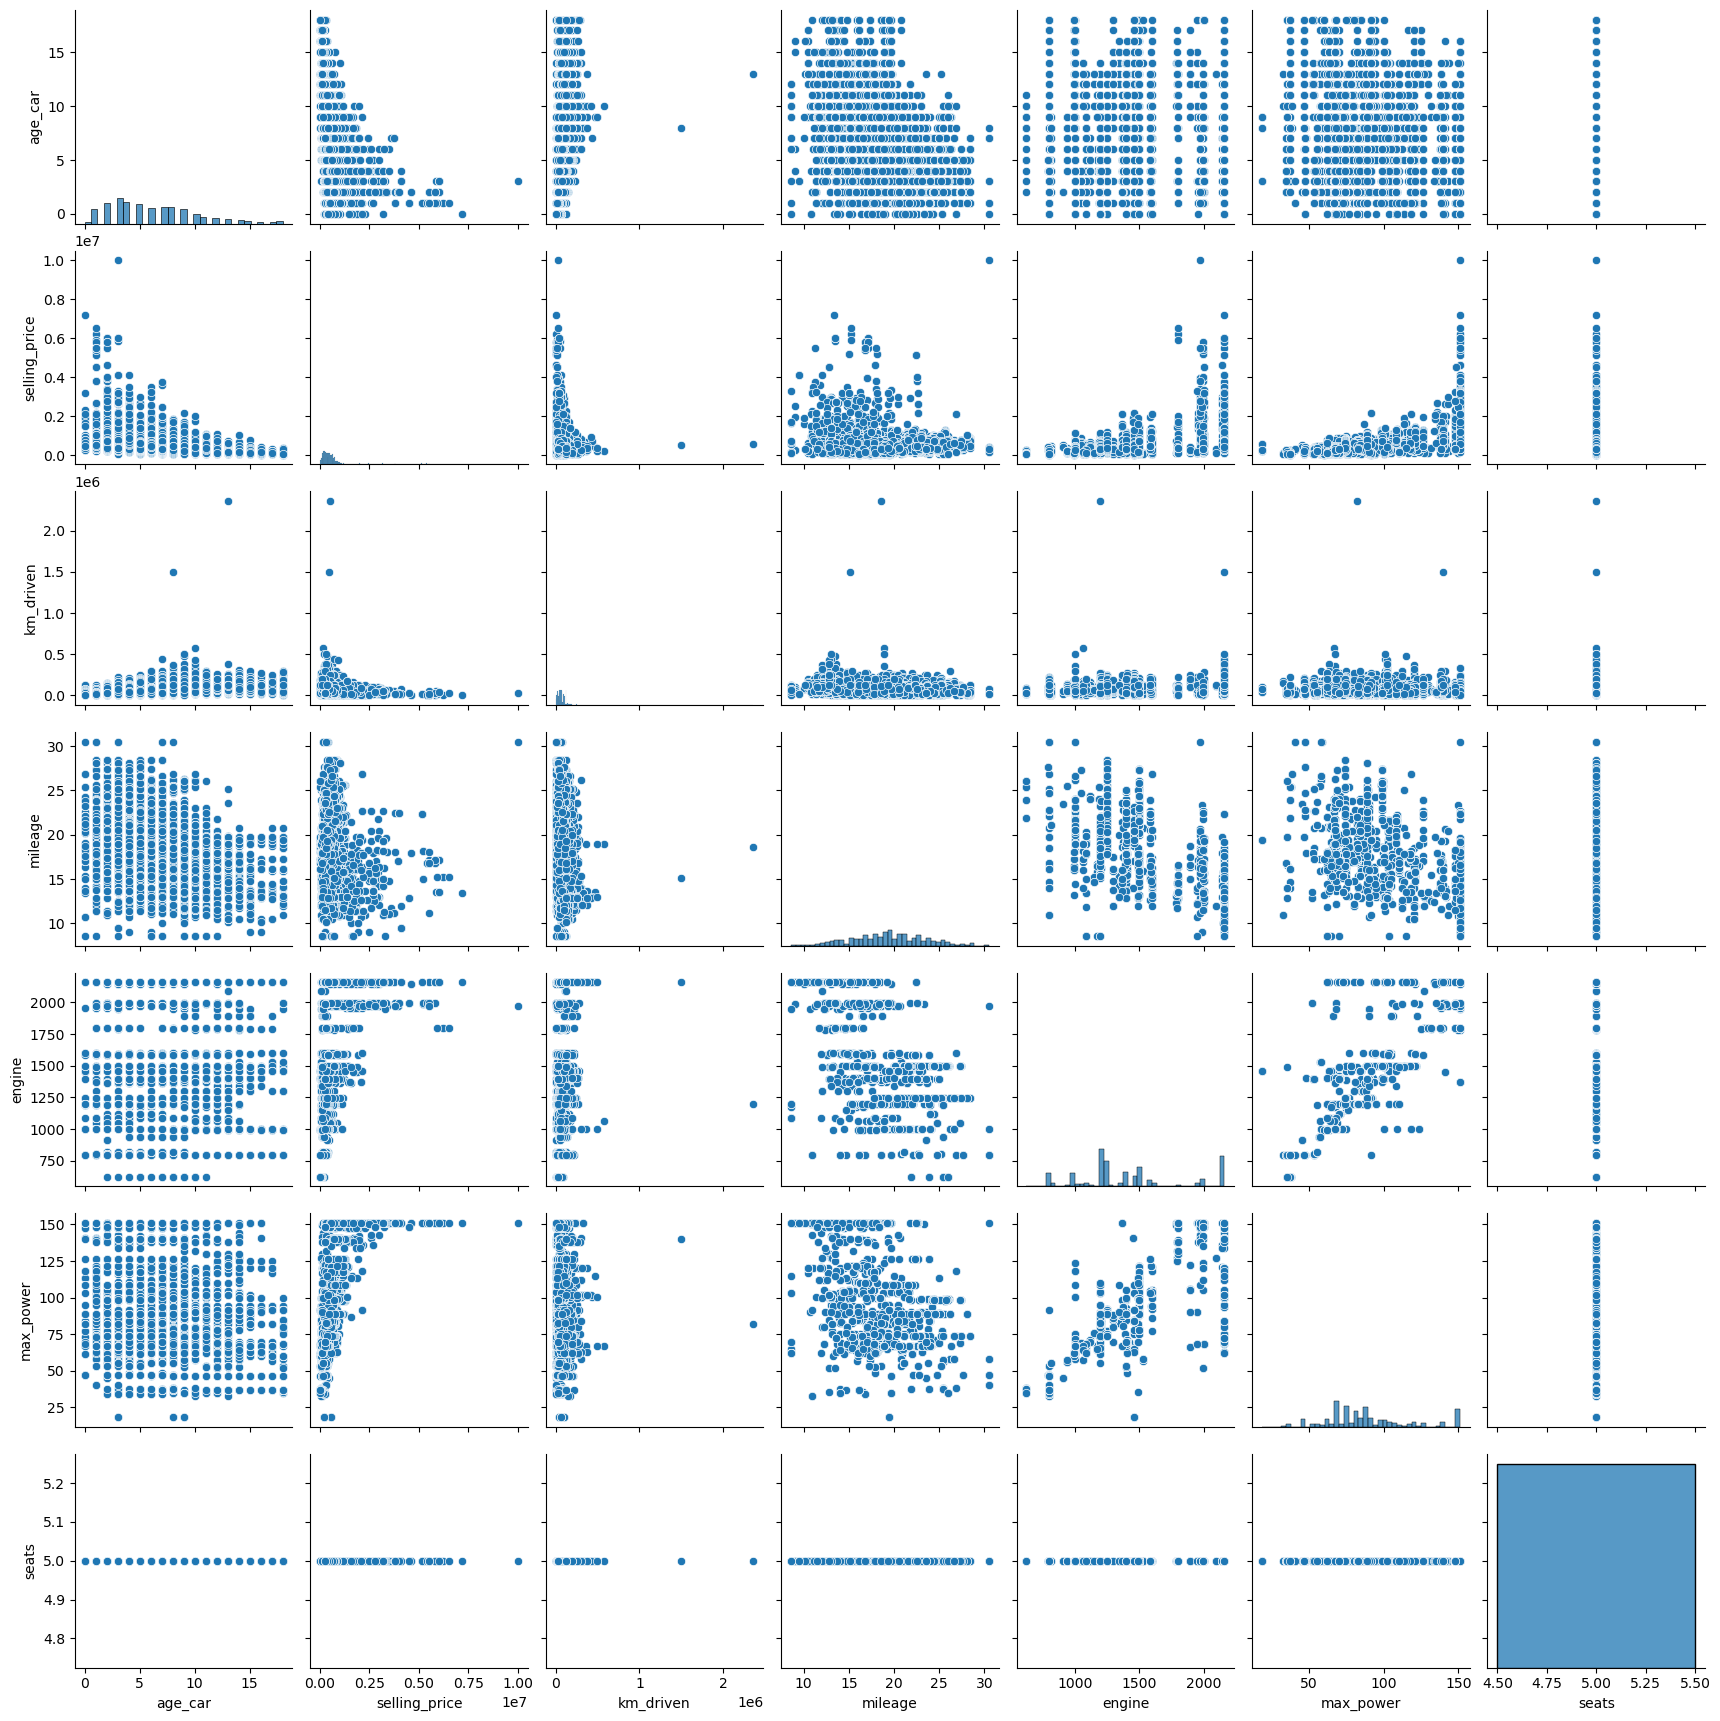

In [160]:
sns.pairplot(df)

Text(0.5, 1.0, 'CORRELATION IN THE DATA')

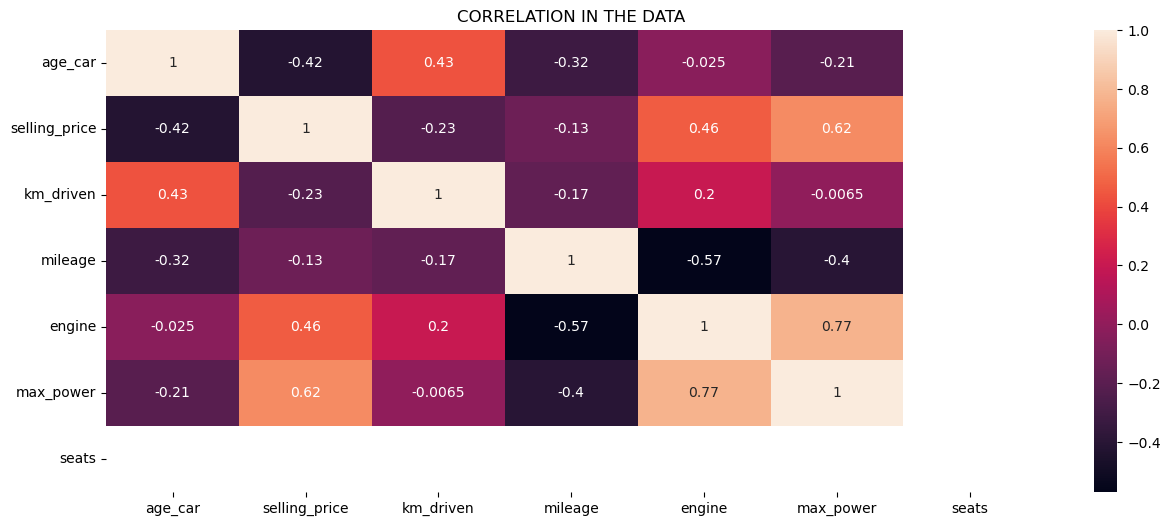

In [161]:
plt.figure(figsize=(15,6))
sns.heatmap(df_num.corr(),annot=True, fmt='.2g')
plt.title('CORRELATION IN THE DATA')

In [162]:
df.groupby(['name'])['selling_price'].median().sort_values (ascending = False)

name
BMW              5400000.0
Lexus            5150000.0
Land             4500000.0
Volvo            3400000.0
Jaguar           3000000.0
Audi             2287500.0
Mercedes-Benz    2075500.0
Isuzu            1900000.0
MG               1750000.0
Kia              1737500.0
Jeep             1675000.0
Force             910000.0
Mitsubishi        787500.0
Toyota            750000.0
Skoda             645000.0
Honda             570000.0
Mahindra          560000.0
Ford              480000.0
Hyundai           434999.0
Volkswagen        427500.0
Renault           397000.0
Nissan            375000.0
Maruti            366000.0
Datsun            300000.0
Ashok             300000.0
Fiat              280000.0
Tata              280000.0
Chevrolet         223000.0
Ambassador        110500.0
Daewoo             86000.0
Opel               68000.0
Peugeot            57000.0
Name: selling_price, dtype: float64

In [163]:
df.groupby(['name'])['selling_price'].agg({'mean','median'})

,mean,median
name,,
Ambassador,1.240000e+05,110500.0
Ashok,3.000000e+05,300000.0
Audi,2.612200e+06,2287500.0
BMW,4.109917e+06,5400000.0
Chevrolet,2.738675e+05,223000.0
Daewoo,7.700000e+04,86000.0
Datsun,3.146000e+05,300000.0
Fiat,2.960638e+05,280000.0
Force,8.875000e+05,910000.0


**Encoding the data:**

In [164]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder (drop = 'first')
df_cat_ohe = ohe.fit_transform (df_cat).toarray()
df_cat_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
feat_name = ohe.get_feature_names_out ()
feat_name

array(['name_Ashok', 'name_Audi', 'name_BMW', 'name_Chevrolet',
       'name_Daewoo', 'name_Datsun', 'name_Fiat', 'name_Force',
       'name_Ford', 'name_Honda', 'name_Hyundai', 'name_Isuzu',
       'name_Jaguar', 'name_Jeep', 'name_Kia', 'name_Land', 'name_Lexus',
       'name_MG', 'name_Mahindra', 'name_Maruti', 'name_Mercedes-Benz',
       'name_Mitsubishi', 'name_Nissan', 'name_Opel', 'name_Peugeot',
       'name_Renault', 'name_Skoda', 'name_Tata', 'name_Toyota',
       'name_Volkswagen', 'name_Volvo', 'fuel_Diesel', 'fuel_LPG',
       'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'], dtype=object)

In [166]:
encoded_df = pd.DataFrame (df_cat_ohe, columns = feat_name)
encoded_df

,name_Ashok,name_Audi,name_BMW,name_Chevrolet,name_Daewoo,name_Datsun,name_Fiat,name_Force,name_Ford,name_Honda,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
8125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


### Splitting the data into Train and Test

In [167]:
df_ = df_num[['age_car','km_driven','mileage','engine','max_power','seats']]
df_

,age_car,km_driven,mileage,engine,max_power,seats
0,6.0,145500,23.40,1248.0,74.00,5.0
1,6.0,120000,21.14,1498.0,103.52,5.0
2,14.0,140000,17.70,1497.0,78.00,5.0
3,10.0,127000,23.00,1396.0,90.00,5.0
4,13.0,120000,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...
8123,7.0,110000,18.50,1197.0,82.85,5.0
8124,13.0,119000,16.80,1493.0,110.00,5.0
8125,11.0,120000,19.30,1248.0,73.90,5.0
8126,7.0,25000,23.57,1396.0,70.00,5.0


In [168]:
X1 = pd.concat ([df_ , encoded_df], axis = 1)
X1

,age_car,km_driven,mileage,engine,max_power,seats,name_Ashok,name_Audi,name_BMW,name_Chevrolet,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,6.0,145500,23.40,1248.0,74.00,5.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,6.0,120000,21.14,1498.0,103.52,5.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,14.0,140000,17.70,1497.0,78.00,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,10.0,127000,23.00,1396.0,90.00,5.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13.0,120000,16.10,1298.0,88.20,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,7.0,110000,18.50,1197.0,82.85,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8124,13.0,119000,16.80,1493.0,110.00,5.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
8125,11.0,120000,19.30,1248.0,73.90,5.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8126,7.0,25000,23.57,1396.0,70.00,5.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [169]:
y1 = df_num[['selling_price']]
y1

,selling_price
0,450000
1,370000
2,158000
3,225000
4,130000
...,...
8123,320000
8124,135000
8125,382000
8126,290000


In [170]:
print(X1.shape)
print(y1.shape)

(8128, 47)
(8128, 1)


In [171]:
X_train,X_test,y_train,y_test = train_test_split(X1, y1, random_state = 20, test_size = 0.25)

In [172]:
print(X_train.shape,X_test.shape)

print(y_train.shape,y_test.shape)

(6096, 47) (2032, 47)
(6096, 1) (2032, 1)


### Using Statsmodel:

In [219]:
import statsmodels.api as sm

In [174]:
X2 = X_train.copy()
X2.reset_index(inplace = True, drop = True)
y2 = y_train.copy()
y2.reset_index(inplace = True, drop = True)

In [175]:
X2 = sm.add_constant(X2)
X2.shape,y2.shape

((6096, 47), (6096, 1))

In [176]:
stats_model = sm.OLS(y2, X2)

results = stats_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     702.3
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:37:30   Log-Likelihood:                -86004.
No. Observations:                6096   AIC:                         1.721e+05
Df Residuals:                    6049   BIC:                         1.724e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age_car                      -4.965e+04   1540.277    -32.235      0.000   -5.27e+04   -4.66e+04
km_driven                       -0.5868      0.090     -6.543      0.000      -0.763      -0.411
mileage                      -1.031e+04   1931.916     -5.339      0.000   -1.41e+04   -6527.327
engine                          90.8256     29.055      3.126      0.002      33.868     147.783
max_power                     4683.7026    292.299     16.024      0.000    4110.693    5256.712
seats                         1.198e+05   4.93e+04      2.430      0.015    2.31e+04    2.16e+05
name_Ashok                   -1.155e+04      4e+05     -0.029      0.977   -7.95e+05    7.72e+05
name_Audi                     1.102e+06    2.4e+05      4.597      0.000    6.32e+05    1.57e+06
name_BMW                      2.865e+06   2.35e+05     12.203      0.000     2.4e+06    3.33e+06
name_Chevrolet               -8.433e+04   2.33e+05     -0.363      0.717    -5.4e+05    3.72e+05
name_Daewoo                   4.508e+05   2.99e+05      1.507      0.132   -1.36e+05    1.04e+06
name_Datsun                  -1.358e+05   2.36e+05     -0.575      0.565   -5.99e+05    3.27e+05
name_Fiat                    -7.661e+04   2.38e+05     -0.322      0.747   -5.43e+05     3.9e+05
name_Force                   -3.786e+04   2.83e+05     -0.134      0.893   -5.92e+05    5.16e+05
name_Ford                    -1.214e+04   2.32e+05     -0.052      0.958   -4.67e+05    4.43e+05
name_Honda                    1.387e+04   2.32e+05      0.060      0.952   -4.42e+05    4.69e+05
name_Hyundai                  6866.6984   2.32e+05      0.030      0.976   -4.48e+05    4.61e+05
name_Isuzu                    6.613e+05   2.83e+05      2.335      0.020    1.06e+05    1.22e+06
name_Jaguar                   1.649e+06   2.36e+05      6.979      0.000    1.19e+06    2.11e+06
name_Jeep                     1.062e+06   2.41e+05      4.404      0.000    5.89e+05    1.53e+06
name_Kia                      3.452e+05   2.99e+05      1.156      0.248    -2.4e+05    9.31e+05
name_Land                      2.54e+06   2.84e+05      8.959      0.000    1.98e+06     3.1e+06
name_Lexus                    3.912e+06   2.41e+05     16.239      0.000    3.44e+06    4.38e+06
name_MG                       5.546e+05   3.28e+05      1.692      0.091    -8.8e+04     1.2e+06
name_Mahindra                -3.864e+04   2.31e+05     -0.167      0.867   -4.92e+05    4.15e+05
name_Maruti                   7.638e+04   2.32e+05      0.329      0.742   -3.78e+05    5.31e+05
name_Mercedes-Benz            1.289e+06   2.38e+05      5.409      0.000    8.22e+05    1.76e+06
name_Mitsubishi               2.649e+05   2.49e+05      1.062      0.288   -2.24e+05    7.54e+05
name_Nissan                  -4.897e+04   2.35e+05     -0.208      0.835    

Interpretation:
    
    Here we can see that there are some features that are not significant. Thus we are extracting them and then moving forward with our interpretation about the coefficients.

In [223]:
X_test2 = X_test
X_test2 = sm.add_constant(X_test2)
y_pred = results.predict(X_test2)

In [230]:
from sklearn.metrics import mean_squared_error, r2_score

mse_ols1 = mean_squared_error(y_test, y_pred)
r2_ols1 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse_ols1)
print("R-squared (R2):", r2_ols1)

Mean Squared Error (MSE): 106307156621.11044
R-squared (R2): 0.8225610013606345


In [177]:
# Backward elimination to drop insignificant variables one by one

cols = list(X2.columns)
p = []

while len(cols)>1:
    X2 = X2[cols]
    model= sm.OLS(y2, X2).fit()
    
    p = model.pvalues
    pmax = max(p)
    pid = p.idxmax()
    if pmax>0.05:
        cols.remove(pid)
        print('Variable removed:', pid, pmax)
    else:
        break
cols   

Variable removed: name_Ashok 0.976938766590707
Variable removed: name_Ford 0.9652014964144361
Variable removed: name_Force 0.8751398385662437
Variable removed: name_Peugeot 0.6490657146809656
Variable removed: fuel_Petrol 0.5759861147288188
Variable removed: name_Renault 0.5646510777424454
Variable removed: name_Nissan 0.4873893771541348
Variable removed: name_Mahindra 0.43900535887959535
Variable removed: name_Fiat 0.37938549085463713
Variable removed: name_Skoda 0.3835474078545884
Variable removed: name_Opel 0.3713805168381151
Variable removed: owner_Fourth & Above Owner 0.3470400518367073
Variable removed: fuel_LPG 0.1313166259223622
Variable removed: name_Volkswagen 0.11823839271683516
Variable removed: name_Chevrolet 0.06943980464694563
Variable removed: name_Datsun 0.05526580211557765


['age_car',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats',
 'name_Audi',
 'name_BMW',
 'name_Daewoo',
 'name_Honda',
 'name_Hyundai',
 'name_Isuzu',
 'name_Jaguar',
 'name_Jeep',
 'name_Kia',
 'name_Land',
 'name_Lexus',
 'name_MG',
 'name_Maruti',
 'name_Mercedes-Benz',
 'name_Mitsubishi',
 'name_Tata',
 'name_Toyota',
 'name_Volvo',
 'fuel_Diesel',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Manual',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner']

Interpretation & Report:

        Statsmodel is to draw inference from the data.
        
        From the above data, we can draw inference that, if we purchace a diseal fuel type car then we have to pay 1.14 lakh extra, similarly, if we are purchasing a second hand or third hand used car then we have to pay 45000 and 59000 less.

In [ ]:
X21 = X2[['age_car','km_driven', 'mileage', 'engine', 'max_power', 'seats', 'name_Audi', 'name_BMW', 'name_Daewoo', 'name_Honda',
          'name_Hyundai', 'name_Isuzu', 'name_Jaguar','name_Jeep', 'name_Kia', 'name_Land', 'name_Lexus', 'name_MG', 'name_Maruti',
 'name_Mercedes-Benz', 'name_Mitsubishi', 'name_Tata', 'name_Toyota', 'name_Volvo', 'fuel_Diesel', 'seller_type_Individual',
 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner']]
X21 = sm.add_constant(X21)
X21_test = X_test2[['age_car','km_driven', 'mileage', 'engine', 'max_power', 'seats', 'name_Audi', 'name_BMW', 'name_Daewoo', 'name_Honda',
          'name_Hyundai', 'name_Isuzu', 'name_Jaguar','name_Jeep', 'name_Kia', 'name_Land', 'name_Lexus', 'name_MG', 'name_Maruti',
 'name_Mercedes-Benz', 'name_Mitsubishi', 'name_Tata', 'name_Toyota', 'name_Volvo', 'fuel_Diesel', 'seller_type_Individual',
 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner']]
X21_test = sm.add_constant(X_test2)

In [227]:
stats_model1 = sm.OLS(y2, X21)

results1 = stats_model1.fit()

results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          selling_price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1076.
Date:                Wed, 28 Jun 2023   Prob (F-statistic):               0.00
Time:                        20:54:36   Log-Likelihood:                -86013.
No. Observations:                6096   AIC:                         1.721e+05
Df Residuals:                    6065   BIC:                         1.723e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age_car                       -4.99e+04   1480.233    -33.709      0.000   -5.28e+04    -4.7e+04
km_driven                       -0.5904      0.089     -6.600      0.000      -0.766      -0.415
mileage                      -1.016e+04   1892.485     -5.369      0.000   -1.39e+04   -6450.074
engine                         100.2720     26.400      3.798      0.000      48.519     152.025
max_power                     4645.6936    279.007     16.651      0.000    4098.741    5192.646
seats                         1.132e+05   1.27e+04      8.933      0.000    8.84e+04    1.38e+05
name_Audi                     1.148e+06   6.25e+04     18.357      0.000    1.03e+06    1.27e+06
name_BMW                       2.91e+06   3.97e+04     73.230      0.000    2.83e+06    2.99e+06
name_Daewoo                   5.084e+05   1.89e+05      2.686      0.007    1.37e+05     8.8e+05
name_Honda                    6.294e+04   2.06e+04      3.050      0.002    2.25e+04    1.03e+05
name_Hyundai                  5.693e+04   1.41e+04      4.034      0.000    2.93e+04    8.46e+04
name_Isuzu                    7.066e+05   1.64e+05      4.317      0.000    3.86e+05    1.03e+06
name_Jaguar                   1.694e+06   4.76e+04     35.610      0.000     1.6e+06    1.79e+06
name_Jeep                     1.109e+06   6.69e+04     16.575      0.000    9.77e+05    1.24e+06
name_Kia                       3.93e+05   1.89e+05      2.082      0.037    2.29e+04    7.63e+05
name_Land                     2.585e+06   1.64e+05     15.745      0.000    2.26e+06    2.91e+06
name_Lexus                    3.955e+06   6.67e+04     59.271      0.000    3.82e+06    4.09e+06
name_MG                       6.055e+05   2.31e+05      2.616      0.009    1.52e+05    1.06e+06
name_Maruti                   1.267e+05   1.33e+04      9.530      0.000    1.01e+05    1.53e+05
name_Mercedes-Benz            1.335e+06    5.8e+04     23.019      0.000    1.22e+06    1.45e+06
name_Mitsubishi               3.091e+05   9.47e+04      3.264      0.001    1.23e+05    4.95e+05
name_Tata                    -6.991e+04   1.66e+04     -4.219      0.000   -1.02e+05   -3.74e+04
name_Toyota                   3.358e+05   2.05e+04     16.388      0.000    2.96e+05    3.76e+05
name_Volvo                    1.947e+06   5.18e+04     37.606      0.000    1.85e+06    2.05e+06
fuel_Diesel                   1.202e+05   1.39e+04      8.629      0.000    9.29e+04    1.47e+05
seller_type_Individual       -3.486e+04   1.37e+04     -2.542      0.011   -6.17e+04   -7977.862
seller_type_Trustmark Dealer -7.594e+04   2.86e+04     -2.652      0.008   -1.32e+05   -1.98e+04
transmission_Manual          -1.546e+05    1.7e+04     -9.078      0.000   -1.88e+05   -1.21e+05
owner_Second Owner           -5.615e+04   1.06e+04     -5.298      0.000   -

Interpretation:
    
    After dropping the insignificant features, we fit the model again to check if there is any other insignificant feature because of dropping them. However, we can see that all the features are significant.
    
    Initially if we are purchasing a second hand or third hand used car then we have to pay 45000 and 59000 less. However, now we can seen that  if we are purchasing a second hand or third hand used car then we have to pay 35000 and 56000 less. 

### Using Sklearn:

### 1. LINEAR REGRESION:

##### BASE MODEL

In [178]:
lm = LinearRegression()
lr = lm.fit(X_train,y_train)

R2=lr.score(X_train,y_train)
R2

0.8422899365392511

In [179]:
lr.intercept_, lr.coef_

(array([598867.47029488]),
 array([[-4.96510694e+04, -5.86752845e-01, -1.03145699e+04,
          9.08256293e+01,  4.68370264e+03,  1.03245839e-08,
         -1.15500183e+04,  1.10193308e+06,  2.86514312e+06,
         -8.43298374e+04,  4.50835932e+05, -1.35799660e+05,
         -7.66117696e+04, -3.78598912e+04, -1.21434272e+04,
          1.38704697e+04,  6.86669840e+03,  6.61266163e+05,
          1.64893253e+06,  1.06155748e+06,  3.45179195e+05,
          2.54011719e+06,  3.91151100e+06,  5.54584883e+05,
         -3.86442638e+04,  7.63753406e+04,  1.28897311e+06,
          2.64916703e+05, -4.89670662e+04,  2.56817784e+05,
          1.36387838e+05, -3.06798046e+04, -6.56651954e+04,
         -1.17711382e+05,  2.90741980e+05, -8.01336875e+04,
          1.90108571e+06,  1.47751313e+05,  1.23660999e+05,
          2.84846295e+04, -3.27509543e+04, -7.58838646e+04,
         -1.56718745e+05, -2.86947403e+04, -5.76515350e+04,
          3.83873030e+06, -3.91017152e+04]]))

EVALUATION:

In [180]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

In [181]:
print('For LR Base Model - Train Data: ')
train_predictions = lr.predict(X_train)

mse_train = mean_squared_error(y_train,train_predictions)
print('MSE = ', mse_train)

rmse_train = np.sqrt(mean_squared_error(y_train,train_predictions))
print('RMSE = ',rmse_train)

r2_train = r2_score(y_train,train_predictions)
print('R2 = ',r2_train)

train_mape = mean_absolute_percentage_error(y_train,train_predictions)
print('MAPE = ', train_mape)

print('------------------------------------------------------------------')

print('For LR Base Model - Test Data: ')
lr_model_pred = lr.predict (X_test)

mse_base = mean_squared_error (y_test, lr_model_pred)
rmse_base = np.sqrt(mean_squared_error (y_test, lr_model_pred))
mape_base = mean_absolute_percentage_error(y_test, lr_model_pred)

print('MSE = ', mse_base)
print('RMSE = ', rmse_base)
print('MAPE = ',mape_base)

For LR Base Model - Train Data: 
MSE =  105166370102.92647
RMSE =  324293.64795340423
R2 =  0.8422899365392511
MAPE =  0.450571465639872
------------------------------------------------------------------
For LR Base Model - Test Data: 
MSE =  106307156621.62749
RMSE =  326047.7827276663
MAPE =  0.4711107807926011


Interpretation:
    
    The R2 for train for the base Linear Regression Model is 0.842 and mape for train and test is 0.45 and 0.47 which tells us that there is very less gap between our train and test prediction.

#### Feature Selection

1. Sequential Feature Selection (SFS):

In [182]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [183]:
# Define a range of k values

k_values = range(1, 30)

for k in k_values:
    
    linear_regression = LinearRegression()

    # Creating the Sequential Feature Selector object
    
    sfs = SequentialFeatureSelector(linear_regression,
                                    k_features=k,
                                    forward=True,
                                    scoring='r2',
                                    cv=5)
    
    # Perform feature selection
    
    sfs.fit(X_train, y_train)

    # Get the selected feature subset
    
    selected_features_sfs_lr = X_train.columns[list(sfs.k_feature_idx_)]

    print(f"Selected features for k={k}: {selected_features_sfs_lr}")

Selected features for k=1: Index(['max_power'], dtype='object')
Selected features for k=2: Index(['max_power', 'name_BMW'], dtype='object')
Selected features for k=3: Index(['max_power', 'name_BMW', 'name_Lexus'], dtype='object')
Selected features for k=4: Index(['age_car', 'max_power', 'name_BMW', 'name_Lexus'], dtype='object')
Selected features for k=5: Index(['age_car', 'max_power', 'name_BMW', 'name_Jaguar', 'name_Lexus'], dtype='object')
Selected features for k=6: Index(['age_car', 'max_power', 'name_BMW', 'name_Jaguar', 'name_Lexus',
       'name_Volvo'],
      dtype='object')
Selected features for k=7: Index(['age_car', 'max_power', 'name_BMW', 'name_Jaguar', 'name_Lexus',
       'name_Volvo', 'owner_Test Drive Car'],
      dtype='object')
Selected features for k=8: Index(['age_car', 'max_power', 'name_BMW', 'name_Jaguar', 'name_Lexus',
       'name_Mercedes-Benz', 'name_Volvo', 'owner_Test Drive Car'],
      dtype='object')
Selected features for k=9: Index(['age_car', 'max_powe

Selected features for k=29: Index(['age_car', 'km_driven', 'mileage', 'engine', 'max_power', 'name_Audi',
       'name_BMW', 'name_Chevrolet', 'name_Daewoo', 'name_Datsun',
       'name_Isuzu', 'name_Jaguar', 'name_Jeep', 'name_Land', 'name_Lexus',
       'name_MG', 'name_Maruti', 'name_Mercedes-Benz', 'name_Mitsubishi',
       'name_Tata', 'name_Toyota', 'name_Volkswagen', 'name_Volvo',
       'fuel_Diesel', 'fuel_LPG', 'transmission_Manual', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')


In [184]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

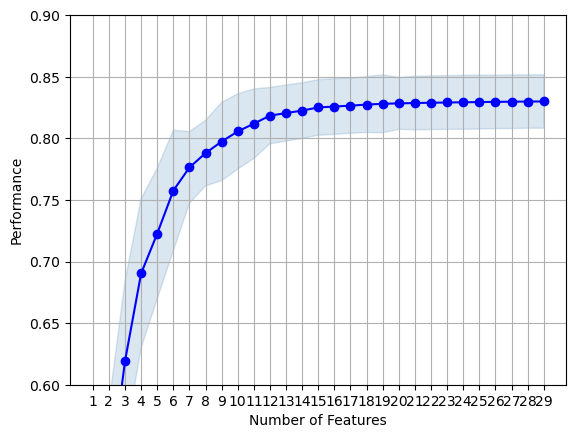

In [185]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

Interpretation:
    
    From above graph we can see that there is not much change in performance as we increase the number of features.
    
    Constant performance can be seen if we select only 18 features.

**Fitting the LR model with selected features through SFS**

In [186]:
X2_train = X_train[['age_car', 'engine', 'max_power', 'name_Audi', 'name_BMW',
       'name_Jaguar', 'name_Jeep', 'name_Land', 'name_Lexus', 'name_Maruti',
       'name_Mercedes-Benz', 'name_Tata', 'name_Toyota', 'name_Volvo',
       'fuel_Diesel', 'transmission_Manual', 'owner_Second Owner',
       'owner_Test Drive Car']]
X2_test = X_test[['age_car', 'engine', 'max_power', 'name_Audi', 'name_BMW',
       'name_Jaguar', 'name_Jeep', 'name_Land', 'name_Lexus', 'name_Maruti',
       'name_Mercedes-Benz', 'name_Tata', 'name_Toyota', 'name_Volvo',
       'fuel_Diesel', 'transmission_Manual', 'owner_Second Owner',
       'owner_Test Drive Car']]

print(X2_train.shape, X2_test.shape)

(6096, 18) (2032, 18)


In [187]:
lm = LinearRegression()
lr_sfs = lm.fit(X2_train,y_train)

In [188]:
print('For LR SFS Model - Train Data: ')
sfs_train_preds = lr_sfs.predict(X2_train)

sfs_mse_train = mean_squared_error(y_train,sfs_train_preds)
print('MSE = ', sfs_mse_train)

sfs_rmse_train = np.sqrt(mean_squared_error(y_train,sfs_train_preds))
print('RMSE = ',sfs_rmse_train)

sfs_R2_sfs = r2_score(y_train, sfs_train_preds)
print('r2 = ',sfs_R2_sfs)

sfs_train_mape = mean_absolute_percentage_error(y_train,sfs_train_preds)
print('MAPE = ', sfs_train_mape)

print('------------------------------------------------------------------')

print('For LR SFS Model - Test Data: ')
lr_sfs_pred = lr_sfs.predict (X2_test)

mse_sfs1 = mean_squared_error (y_test, lr_sfs_pred)
rmse_sfs1 = np.sqrt(mean_squared_error (y_test, lr_sfs_pred))
mape_sfs1 = mean_absolute_percentage_error(y_test, lr_sfs_pred)

print('MSE = ', mse_sfs1)
print('RMSE = ', rmse_sfs1)
print('MAPE = ',mape_sfs1)

For LR SFS Model - Train Data: 
MSE =  108086867741.38268
RMSE =  328765.6729973229
r2 =  0.8379102867762412
MAPE =  0.4777116657471422
------------------------------------------------------------------
For LR SFS Model - Test Data: 
MSE =  110194898527.72955
RMSE =  331956.16958829
MAPE =  0.5092259710000224


Interpretation:
    
    The R2 for train using the Sequential Feature Selection is 0.837 and mape for train and test is 0.47 and 0.50 which tells us that there is very less gap between our train and test prediction.

2. Recursive Feature Elimination:

In [189]:
from sklearn.feature_selection import RFE

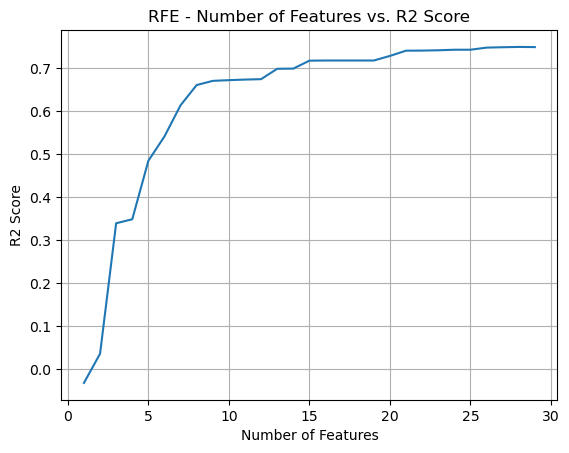

In [190]:
# Define a range of k values
k_values = range(1, 30)

# Create empty lists to store results
r2_scores = []
num_features = []
selected_features = []

# Perform feature selection for each value of k
for k in k_values:
    
    # Create an instance of the linear regression model
    linear_regression = LinearRegression()

    # Create the RFE object
    rfe = RFE(estimator=linear_regression,
              n_features_to_select=k,
              step=1)

    # Perform feature selection
    rfe.fit(X_train, y_train)

    # Get the selected feature subset
    selected_features_rfe_lr = X_train.columns[rfe.support_]
    
    # Get the score of the selected feature subset
    r2_scoree = linear_regression.fit(X_train[selected_features_rfe_lr], y_train).score(X_test[selected_features_rfe_lr], y_test)

    # Store results
    r2_scores.append(r2_scoree)
    num_features.append(k)
    selected_features.append(selected_features_rfe_lr)

# Plot the RFE results
plt.plot(num_features, r2_scores)
plt.xlabel('Number of Features')
plt.ylabel('R2 Score')
plt.title('RFE - Number of Features vs. R2 Score')
plt.grid(True)
plt.show()

In [191]:
for k, features in zip(k_values, selected_features):
    print(f"Selected features for k={k}: {features}")

Selected features for k=1: Index(['owner_Test Drive Car'], dtype='object')
Selected features for k=2: Index(['name_Lexus', 'owner_Test Drive Car'], dtype='object')
Selected features for k=3: Index(['name_BMW', 'name_Lexus', 'owner_Test Drive Car'], dtype='object')
Selected features for k=4: Index(['name_BMW', 'name_Land', 'name_Lexus', 'owner_Test Drive Car'], dtype='object')
Selected features for k=5: Index(['name_BMW', 'name_Land', 'name_Lexus', 'name_Volvo',
       'owner_Test Drive Car'],
      dtype='object')
Selected features for k=6: Index(['name_BMW', 'name_Jaguar', 'name_Land', 'name_Lexus', 'name_Volvo',
       'owner_Test Drive Car'],
      dtype='object')
Selected features for k=7: Index(['name_BMW', 'name_Jaguar', 'name_Land', 'name_Lexus',
       'name_Mercedes-Benz', 'name_Volvo', 'owner_Test Drive Car'],
      dtype='object')
Selected features for k=8: Index(['name_Audi', 'name_BMW', 'name_Jaguar', 'name_Land', 'name_Lexus',
       'name_Mercedes-Benz', 'name_Volvo', 'o

In [192]:
lir = LinearRegression()

rfe = RFE(lir, n_features_to_select=8, verbose=2)
rfe.fit(X_train, y_train)

Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 fe

RFE(estimator=LinearRegression(), n_features_to_select=8, verbose=2)

In [193]:
pd.DataFrame(rfe.ranking_, index=X_train.columns, columns=['rank'])

,rank
age_car,31
km_driven,39
mileage,34
engine,38
max_power,37
seats,40
name_Ashok,30
name_Audi,1
name_BMW,1
name_Chevrolet,16


In [194]:
# Create a Linear Regression model
lr = LinearRegression()

rfe_lr = RFE(estimator=lr, n_features_to_select=None)
# Perform RFE feature selection
X_selected_lr = rfe_lr.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices_lr = rfe_lr.get_support(indices=True)

# Print the selected feature indices and names
selected_feature_names_lr = X_train.columns[selected_feature_indices_lr]
print("Selected Feature Indices:", selected_feature_indices_lr)
print("Selected Feature Names:", selected_feature_names_lr)
print("Number Selected Features before Rfe:",len(X_train.columns))
print("Number Selected Features after Rfe:", len(selected_feature_names_lr))

Selected Feature Indices: [ 7  8  9 10 12 13 17 18 19 20 21 22 23 26 27 29 30 34 36 37 42 44 45]
Selected Feature Names: Index(['name_Audi', 'name_BMW', 'name_Chevrolet', 'name_Daewoo', 'name_Fiat',
       'name_Force', 'name_Isuzu', 'name_Jaguar', 'name_Jeep', 'name_Kia',
       'name_Land', 'name_Lexus', 'name_MG', 'name_Mercedes-Benz',
       'name_Mitsubishi', 'name_Opel', 'name_Peugeot', 'name_Toyota',
       'name_Volvo', 'fuel_Diesel', 'transmission_Manual',
       'owner_Second Owner', 'owner_Test Drive Car'],
      dtype='object')
Number Selected Features before Rfe: 47
Number Selected Features after Rfe: 23


**Fitting the LR model with selected features from RFE**

In [195]:
X3_train = X_train[['name_Audi', 'name_BMW', 'name_Chevrolet', 'name_Daewoo', 'name_Fiat',
       'name_Force', 'name_Isuzu', 'name_Jaguar', 'name_Jeep', 'name_Kia',
       'name_Land', 'name_Lexus', 'name_MG', 'name_Mercedes-Benz',
       'name_Mitsubishi', 'name_Opel', 'name_Peugeot', 'name_Toyota',
       'name_Volvo', 'fuel_Diesel', 'transmission_Manual',
       'owner_Second Owner', 'owner_Test Drive Car']]
X3_test = X_test[['name_Audi', 'name_BMW', 'name_Chevrolet', 'name_Daewoo', 'name_Fiat',
       'name_Force', 'name_Isuzu', 'name_Jaguar', 'name_Jeep', 'name_Kia',
       'name_Land', 'name_Lexus', 'name_MG', 'name_Mercedes-Benz',
       'name_Mitsubishi', 'name_Opel', 'name_Peugeot', 'name_Toyota',
       'name_Volvo', 'fuel_Diesel', 'transmission_Manual',
       'owner_Second Owner', 'owner_Test Drive Car']]

print(X3_train.shape, X3_test.shape)

(6096, 23) (2032, 23)


In [196]:
lm = LinearRegression()
lr_rfe = lm.fit(X3_train,y_train)

In [197]:
print('For LR RFE Model - Train Data: ')
rfe_train_preds = lr_rfe.predict(X3_train)

rfe_mse_train = mean_squared_error(y_train,rfe_train_preds)
print('MSE = ', rfe_mse_train)

rfe_rmse_train = np.sqrt(mean_squared_error(y_train,rfe_train_preds))
print('RMSE = ',rfe_rmse_train)

rfe_R2_rfe = r2_score(y_train, rfe_train_preds)
print('r2 = ',rfe_R2_rfe)

rfe_train_mape = mean_absolute_percentage_error(y_train,rfe_train_preds)
print('MAPE = ', rfe_train_mape)

print('------------------------------------------------------------------')

print('For LR RFE Model - Test Data: ')
lr_rfe_pred = lr_rfe.predict (X3_test)

mse_rfe1 = mean_squared_error (y_test, lr_rfe_pred)
rmse_rfe1 = np.sqrt(mean_squared_error (y_test, lr_rfe_pred))
r2_rfe1 = r2_score(y_test, lr_rfe_pred)
mape_rfe1 = mean_absolute_percentage_error(y_test, lr_rfe_pred)

print('MSE = ', mse_rfe1)
print('RMSE = ', rmse_rfe1)
print('R2 = ', r2_rfe1)
print('MAPE = ',mape_rfe1)

For LR RFE Model - Train Data: 
MSE =  159279320112.26846
RMSE =  399098.13343621197
r2 =  0.761140831823844
MAPE =  0.6726387328523461
------------------------------------------------------------------
For LR RFE Model - Test Data: 
MSE =  155286358167.86682
RMSE =  394063.9011224789
R2 =  0.7408090219752099
MAPE =  0.651233222650992


Interpretation:
    
    The R2 for LR model by taking the features by RFE (Recursive Feature Elimination) is 0.76 which is less than that of SFS LR model prediction.
    
    Thus, we will go on with the features selected by SFS (Sequential Feature Selection).

### 2. Decision Tree

In [198]:
from sklearn.tree import DecisionTreeRegressor

In [199]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [200]:
DT_model = DecisionTreeRegressor()
DT_model_fit = DT_model.fit(X_train , y_train)

In [201]:
from sklearn.metrics import mean_absolute_error

In [202]:
parameters = {"max_depth": [1, 3, 5, 7, 9, 10], "min_samples_leaf": [2, 3, 4, 5, 6, 7, 8, 9, 10]}

tuning_model = GridSearchCV(DT_model, param_grid = parameters, scoring ='neg_mean_absolute_error', cv=5)
tuning_model.fit(X_train, y_train)
DT = tuning_model.best_estimator_

print('For train data:')
dt_train_pred = DT.predict(X_train)

dt_MSE_train = mean_squared_error(y_train, dt_train_pred)
dt_RMSE_train = np.sqrt(mean_squared_error(y_train, dt_train_pred))
dt_MAPE_train = mean_absolute_percentage_error(y_train, dt_train_pred)

print('MSE =', dt_MSE_train)
print('RMSE =', dt_RMSE_train)
print('MAPE =', dt_MAPE_train*100)

print('-----------------------------------------------------------------')

print('For test data:')
DT_pred = DT.predict(X_test)

mse_DT = mean_squared_error(y_test, DT_pred)
rmse_DT = np.sqrt(mean_squared_error(y_test, DT_pred))
mape_DT = mean_absolute_percentage_error(y_test, DT_pred)

print('MSE for DT model =', mse_DT)
print('RMSE for DT model =', rmse_DT)
print('MAPE for DT test model =', mape_DT*100)

print("Best parameters:", tuning_model.best_params_)

For train data:
MSE = 16793148528.382114
RMSE = 129588.38114731626
MAPE = 14.454677191044501
-----------------------------------------------------------------
For test data:
MSE for DT model = 32760020414.924587
RMSE for DT model = 180997.29394365152
MAPE for DT test model = 18.73886836625534
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2}


performance in train should be better than performance in test

Applying same features in Decision Tree which are obtained through Sequential feature selection-Linear Regression as well as Tunning the model

In [203]:
# fit the Decission Tree Regressor model.

DT_model = DecisionTreeRegressor()
DT_model_fit = DT_model.fit(X2_train , y_train)

In [204]:
parameters={"max_depth" : [1,3,5,7,9,10],"min_samples_leaf":[2,3,4,5,6,7,8,9,10]}

tuning_model = GridSearchCV(DT_model,param_grid=parameters,scoring='neg_mean_absolute_error',cv=5)

tuning_model.fit(X2_train,y_train)
DT = tuning_model.best_estimator_

print('For SFS train data:')
sfs_dt_train_pred = DT.predict(X2_train)

sfs_dt_MSE_train = mean_squared_error(y_train, sfs_dt_train_pred)
sfs_dt_RMSE_train = np.sqrt(mean_squared_error(y_train, sfs_dt_train_pred))
sfs_dt_MAPE_train = mean_absolute_percentage_error(y_train, sfs_dt_train_pred)

print('MSE =', sfs_dt_MSE_train)
print('RMSE =', sfs_dt_RMSE_train)
print('MAPE =', sfs_dt_MAPE_train*100)

print('-----------------------------------------------------------------')

print('For SFS test data:')
DT_pred_sfs = DT.predict(X2_test)

mse_DT_sfs = mean_squared_error (y_test, DT_pred_sfs)
rmse_DT_sfs = np.sqrt(mean_squared_error (y_test, DT_pred_sfs))
mape_DT_sfs = mean_absolute_percentage_error(y_test, DT_pred_sfs)

print('MSE = ', mse_DT_sfs)
print('RMSE = ', rmse_DT_sfs)
print('MAPE = ', mape_DT_sfs*100)

print("Best parameters:", tuning_model.best_params_)

For SFS train data:
MSE = 24315872945.579765
RMSE = 155935.4768664904
MAPE = 15.258725259267791
-----------------------------------------------------------------
For SFS test data:
MSE =  42370284529.01058
RMSE =  205840.43463083386
MAPE =  18.468198867501588
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2}


Applying same features in Decision Tree which are obtained through Recursive Feature Elimination-Linear Regression

In [205]:
DT_model_fit2 = DT_model.fit(X3_train , y_train)

In [206]:
parameters={"max_depth" : [1,3,5,7,9,10,12,14,15,16,17],"min_samples_leaf":[2,3,4,5,6,7,8,9,10]}

tuning_model = GridSearchCV(DT_model_fit2, param_grid = parameters, scoring ='neg_mean_absolute_error',cv=10)

tuning_model.fit(X3_train,y_train)
DT_ = tuning_model.best_estimator_

print('For RFE train data:')
rfe_dt_train_pred = DT_.predict(X3_train)

rfe_dt_MSE_train = mean_squared_error(y_train, rfe_dt_train_pred)
rfe_dt_RMSE_train = np.sqrt(mean_squared_error(y_train, rfe_dt_train_pred))
rfe_dt_MAPE_train = mean_absolute_percentage_error(y_train, rfe_dt_train_pred)

print('MSE =', rfe_dt_MSE_train)
print('RMSE =', rfe_dt_RMSE_train)
print('MAPE =', rfe_dt_MAPE_train*100)

print('-----------------------------------------------------------------')

print('For RFE test data:')
DT_pred_ = DT_.predict(X3_test)

mse_DT2 = mean_squared_error (y_test, DT_pred_)
rmse_DT2 = np.sqrt(mean_squared_error (y_test, DT_pred_))
mape_DT2 = mean_absolute_percentage_error(y_test, DT_pred_)

print('MSE = ', mse_DT2)
print('RMSE = ', rmse_DT2)
print('MAPE = ', mape_DT2*100)

print("Best parameters:", tuning_model.best_params_)

For RFE train data:
MSE = 139962448382.99118
RMSE = 374115.5548530309
MAPE = 66.6790942049279
-----------------------------------------------------------------
For RFE test data:
MSE =  142299496323.33527
RMSE =  377226.0546719106
MAPE =  65.59731182929612
Best parameters: {'max_depth': 12, 'min_samples_leaf': 2}


### 3. K-NN Model:

3.1. With all the features:

In [207]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

In [208]:
df_num

,age_car,selling_price,km_driven,mileage,engine,max_power,seats
0,6.0,450000,145500,23.40,1248.0,74.00,5.0
1,6.0,370000,120000,21.14,1498.0,103.52,5.0
2,14.0,158000,140000,17.70,1497.0,78.00,5.0
3,10.0,225000,127000,23.00,1396.0,90.00,5.0
4,13.0,130000,120000,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...
8123,7.0,320000,110000,18.50,1197.0,82.85,5.0
8124,13.0,135000,119000,16.80,1493.0,110.00,5.0
8125,11.0,382000,120000,19.30,1248.0,73.90,5.0
8126,7.0,290000,25000,23.57,1396.0,70.00,5.0


In [209]:
feat_name = df[['age_car','km_driven','mileage','engine','max_power','seats']]
mmscaler = MinMaxScaler()
X7 = pd.DataFrame(mmscaler.fit_transform(feat_name), columns=feat_name.columns)
X7

,age_car,km_driven,mileage,engine,max_power,seats
0,0.333333,0.061640,0.676232,0.406382,0.419495,0.0
1,0.333333,0.050837,0.573083,0.569196,0.642119,0.0
2,0.777778,0.059310,0.416077,0.568544,0.449661,0.0
3,0.555556,0.053803,0.657976,0.502768,0.540158,0.0
4,0.722222,0.050837,0.343051,0.438945,0.526584,0.0
...,...,...,...,...,...,...
8123,0.388889,0.046601,0.452590,0.373168,0.486237,0.0
8124,0.722222,0.050414,0.375000,0.565939,0.690988,0.0
8125,0.611111,0.050837,0.489103,0.406382,0.418741,0.0
8126,0.388889,0.010591,0.683991,0.502768,0.389329,0.0


In [210]:
X7 = pd.concat([X7, encoded_df], axis = 1)
X7.head()

,age_car,km_driven,mileage,engine,max_power,seats,name_Ashok,name_Audi,name_BMW,name_Chevrolet,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.333333,0.061640,0.676232,0.406382,0.419495,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.333333,0.050837,0.573083,0.569196,0.642119,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.777778,0.059310,0.416077,0.568544,0.449661,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.555556,0.053803,0.657976,0.502768,0.540158,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.722222,0.050837,0.343051,0.438945,0.526584,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [211]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X7, y1, random_state = 10, test_size = 0.3)

In [212]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X1_train, y1_train)

KNeighborsRegressor()

In [213]:
print('K-NN Train Data:')
train_preds_knn = knn.predict(X1_train)

knn_mse_train = mean_squared_error(y1_train, train_preds_knn)
print('MSE = ',knn_mse_train)

knn_rmse_train = np.sqrt(knn_mse_train)
print('RMSE = ',knn_rmse_train)

knn_mape_train = mean_absolute_percentage_error(y1_train, train_preds_knn)
print('MAPE = ',knn_mape_train*100)

print('--------------------------------------------------------------------------------------------------------')

print('K-NN Test Data:')
test_preds_knn = knn.predict(X1_test)

mse_knn = mean_squared_error(y1_test, test_preds_knn)
print('MSE = ',mse_knn)

knn_rmse_test = np.sqrt(mse_knn)
print('RMSE Test: ',knn_rmse_test)

knn_mape_test = mean_absolute_percentage_error(y1_test, test_preds_knn)
print('MAPE = ',knn_mape_test*100)

K-NN Train Data:
MSE =  30715922179.078506
RMSE =  175259.58512754305
MAPE =  16.346722105507702
--------------------------------------------------------------------------------------------------------
K-NN Test Data:
MSE =  74605318571.02338
RMSE Test:  273139.74183744
MAPE =  22.007896823689393


##### Doing Hyperparameter Tuning for K-NN Model:

In [214]:
from sklearn.model_selection import GridSearchCV

In [215]:
param_grid_knn = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}

grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid_knn, scoring = 'neg_mean_squared_error', cv = 5)
grid_search_knn.fit(X1_train, y1_train)
best_knn = grid_search_knn.best_estimator_

print('K-NN Train Data:')
train_preds_knn1 = best_knn.predict(X1_train)

knn_mse_train1 = mean_squared_error(y1_train, train_preds_knn1)
print('MSE = ',knn_mse_train1)

knn_rmse_train1 = np.sqrt(knn_mse_train1)
print('RMSE = ',knn_rmse_train1)

knn_mape_train1 = mean_absolute_percentage_error(y1_train, train_preds_knn1)
print('MAPE = ',knn_mape_train1)

print('--------------------------------------------------------------------------------------------------------')

print('K-NN Test Data:')
test_preds_knn1 = best_knn.predict(X1_test)

mse_knn1 = mean_squared_error(y1_test, test_preds_knn1)
print('MSE = ',mse_knn1)

knn_rmse_test1 = np.sqrt(mse_knn1)
print('RMSE Test: ',knn_rmse_test1)

knn_mape_test1 = mean_absolute_percentage_error(y1_test, test_preds_knn1)
print('MAPE = ',knn_mape_test1)

print("Best Hyperparameters:", grid_search_knn.best_params_)

K-NN Train Data:
MSE =  216385354.04088327
RMSE =  14710.042625393145
MAPE =  0.008361440233090744
--------------------------------------------------------------------------------------------------------
K-NN Test Data:
MSE =  48698829283.22612
RMSE Test:  220678.11237915308
MAPE =  0.18968485119095496
Best Hyperparameters: {'n_neighbors': 7, 'weights': 'distance'}


### Summary of all the models:

In [216]:
summary = pd.DataFrame({'Model':['Linear_Regression_Base_Model','Linear_Regression_SFS','Linear_Regression_RFE','Decision_Tree','Decision_Tree_SFS','Decision_Tree_RFE','K_Nearest_Neighbors'],
                       'Train_RMSE':[rmse_train,sfs_rmse_train,rfe_rmse_train,dt_RMSE_train,sfs_dt_RMSE_train,rfe_dt_RMSE_train,knn_rmse_train],
                       'Test_RMSE':[rmse_base,rmse_sfs1,rmse_rfe1,rmse_DT,rmse_DT_sfs,rmse_DT2,knn_rmse_test],
                       'Train_MAPE':[train_mape*100,sfs_train_mape*100,rfe_train_mape*100,dt_MAPE_train*100,sfs_dt_MAPE_train*100,rfe_dt_MAPE_train*100,knn_mape_train*100],
                       'Test_MAPE':[mape_base*100,mape_sfs1*100,mape_rfe1*100,mape_DT*100,mape_DT_sfs*100,mape_DT2*100,knn_mape_test*100],
                       'R2_Score':[r2_train,sfs_R2_sfs,rfe_R2_rfe,'NA','NA','NA','NA']})
summary

,Model,Train_RMSE,Test_RMSE,Train_MAPE,Test_MAPE,R2_Score
0,Linear_Regression_Base_Model,324293.647953,326047.782728,45.057147,47.111078,0.84229
1,Linear_Regression_SFS,328765.672997,331956.169588,47.771167,50.922597,0.83791
2,Linear_Regression_RFE,399098.133436,394063.901122,67.263873,65.123322,0.761141
3,Decision_Tree,129588.381147,180997.293944,14.454677,18.738868,NA
4,Decision_Tree_SFS,155935.476866,205840.434631,15.258725,18.468199,NA
5,Decision_Tree_RFE,374115.554853,377226.054672,66.679094,65.597312,NA
6,K_Nearest_Neighbors,175259.585128,273139.741837,16.346722,22.007897,NA


## Report

We can see that, the Decission Tree model with SFS feature selected, after tuning its hyperparameters gives us good results for both train and test i.e., MAPE for train = 15.25 and MAPE for test = 18.46.